In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Load the average data file
average_data_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_1-2/npteqfile_averages.txt'
data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2, 
                   names=['TimeStep', 'Temperature_K', 'Pressure_bar', 'Volume_A3', 'TotalEnergy_eV_per_atom'])


C:\Users\jhyang\AppData\Local\Temp\ipykernel_13208\2781304507.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2,


Volume: Slope = -0.46, Intercept = -4.59
Energy: Slope = -0.47, Intercept = -0.43


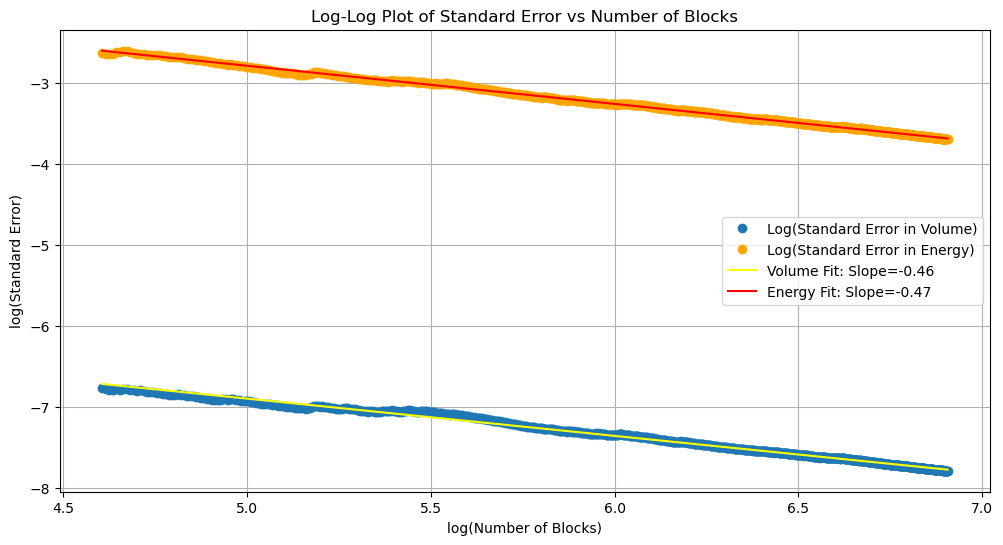

In [3]:
# Convert units
data['Volume_per_atom'] = data['Volume_A3'] / 32
data['Energy_meV_per_atom'] = data['TotalEnergy_eV_per_atom'] * 1000

# Use data from the third block onward
data_after_equil = data[2:]

# Function to calculate standard error for a specified number of blocks
def calculate_standard_error(data, column, num_blocks):
    selected_data = data[column].iloc[:num_blocks]  # Select the first `num_blocks` rows
    mean_value = selected_data.mean()
    std_dev = selected_data.std()
    return std_dev / np.sqrt(num_blocks)

# Define block sizes in the range of 100 to 998
block_sizes = np.arange(100, 999, 1)  # Block sizes from 100 to 998 with a step of 1

# Calculate standard errors for volume and energy
volume_errors = [calculate_standard_error(data_after_equil, 'Volume_per_atom', n) for n in block_sizes]
energy_errors = [calculate_standard_error(data_after_equil, 'Energy_meV_per_atom', n) for n in block_sizes]

# Take the log of block sizes and errors for linear regression
log_block_sizes = np.log(block_sizes)
log_volume_errors = np.log(volume_errors)
log_energy_errors = np.log(energy_errors)

# Perform linear regression for volume and energy
slope_volume, intercept_volume, _, _, _ = linregress(log_block_sizes, log_volume_errors)
slope_energy, intercept_energy, _, _, _ = linregress(log_block_sizes, log_energy_errors)

# Print slope values for Table 3
print(f"Volume: Slope = {slope_volume:.2f}, Intercept = {intercept_volume:.2f}")
print(f"Energy: Slope = {slope_energy:.2f}, Intercept = {intercept_energy:.2f}")

# Plot both datasets in one figure with data points
plt.figure(figsize=(12, 6))
plt.plot(log_block_sizes, log_volume_errors, 'o', label='Log(Standard Error in Volume)')
plt.plot(log_block_sizes, log_energy_errors, 'o', color='orange', label='Log(Standard Error in Energy)')

# Plot regression lines
plt.plot(log_block_sizes, intercept_volume + slope_volume * log_block_sizes, label=f'Volume Fit: Slope={slope_volume:.2f}', color='yellow')
plt.plot(log_block_sizes, intercept_energy + slope_energy * log_block_sizes, label=f'Energy Fit: Slope={slope_energy:.2f}', color='red')

# Set titles and labels
plt.xlabel('log(Number of Blocks)')
plt.ylabel('log(Standard Error)')
plt.title('Log-Log Plot of Standard Error vs Number of Blocks')
plt.legend()
plt.grid(True)
plt.show()